# Módulo 7 - Introdução ao Aprendizado de Máquina

In [43]:
import pandas as pd

In [44]:
dados = pd.read_excel('arquivos_conteudo/analise_dados_mod7_(1).xlsx')

## Preparando os dados

### Filtrar dados CLT

In [45]:
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?']== 'Empregado (CLT)']

### Filtrar etnias com poucos dados

In [46]:
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

In [47]:
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar) ]

In [48]:
dados['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x:1 if x!='Branca' else 0) 

### Transformando Tempo de Experiência em numérico

In [49]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?
de 1 a 2 anos                             743
de 3 a 4 anos                             584
de 4 a 6 anos                             416
Menos de 1 ano                            353
Mais de 10 anos                           277
de 7 a 10 anos                            232
Não tenho experiência na área de dados    127
Name: count, dtype: int64

In [50]:
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract('(\d+)')

In [51]:
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

In [52]:
dados['TEMPO_EXPERIENCIA'].value_counts(dropna = False)

TEMPO_EXPERIENCIA
1     1096
3      584
4      416
10     277
7      232
0      127
Name: count, dtype: int64

### Transformando numero de funcionários em numérico

In [53]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace(r'\D', '', regex=True)

In [54]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract('(\d+)')


### Transformando insatisfação pelo salário em booleano

In [55]:
dados['INSATISFACAO'] = 0

In [56]:
#Criar a coluna de insatisfação (sem atribuição):
dados.loc[dados["Qual o principal motivo da sua insatisfação com a empresa atual?"].notnull(),
          "Qual o principal motivo da sua insatisfação com a empresa atual?"].apply(lambda x: 1 if 'Salário' in x else 0)

1       0
2       0
7       1
10      0
26      1
       ..
4227    0
4234    1
4238    0
4240    1
4270    1
Name: Qual o principal motivo da sua insatisfação com a empresa atual?, Length: 661, dtype: int64

In [58]:
#Atribuir a coluna INSATISFACAO:
dados.loc[dados["Qual o principal motivo da sua insatisfação com a empresa atual?"].notnull(),'INSATISFACAO'] = dados.loc[dados["Qual o principal motivo da sua insatisfação com a empresa atual?"].notnull(),
          "Qual o principal motivo da sua insatisfação com a empresa atual?"].apply(lambda x: 1 if 'Salário' in x else 0)

In [59]:
dados['INSATISFACAO'].value_counts()

INSATISFACAO
0    2453
1     279
Name: count, dtype: int64

### Tratamento Nivel de Ensino

In [62]:
dados["NIVEL DE ENSINO"] = dados["NIVEL DE ENSINO"].apply(lambda x: 
    0 if x == 'Não tenho graduação formal' else
    1 if x == 'Estudante de graduação' else
    2 if x == 'Graduação/Bacharelado' else
    3 if x == 'Pós-graduação' else
    4 if x == 'Mestrado' else
    5 if x == 'Doutorado ou PhD' else -1
)

## Ajuste para iniciar o modelo

### Selecionar colunas para o modelo:

In [64]:
dados = dados[['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
               'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS',
               'SALARIO', 'NOVO_NIVEL']]

### Aplicar get dummies

In [65]:
dados = pd.get_dummies(dados, columns=['GENERO', 'SETOR', 'NOVO_NIVEL', 'REGIAO ONDE MORA'], drop_first=True)

### Separar variável-alvo (y) e variáveis preditoras (X):

In [ ]:
X = dados.drop('SALARIO', axis=1) #ATRIBUTOS
y = dados['SALARIO'] # ALVO

### Separar em treino e teste:

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# X => Atributos
# y => Alvo
# test_size => porcentagem da amostra usada para teste (20% teste 80% treinamento)
# random_state => semente para gerador de numero aleatório (se quiser reproduzir o mesmo resultado, use o mesmo valor)

### Padronizar os dados com StandardScaler

In [69]:
from sklearn.preprocessing import StandardScaler
# normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_test_scaled = scaler.transform(X_test)

## Treinamento do modelo de regressão

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train) # treinar modelo

LinearRegression()

In [74]:
y_pred = model.predict(X_test_scaled)

### Avaliação do modelo

In [75]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [76]:
mse = mean_squared_error(y_test, y_pred) #erro quadrático médio

In [77]:
mse

24595945.54848527

In [80]:
mae = mean_absolute_error(y_test, y_pred) #erro médio absoluto

In [81]:
mae

3374.47514085624

In [82]:
r2 = r2_score(y_test, y_pred)

In [83]:
r2

0.4981669026373565

## Análise dos resultados: Gráfico

In [84]:
import matplotlib.pyplot as plt

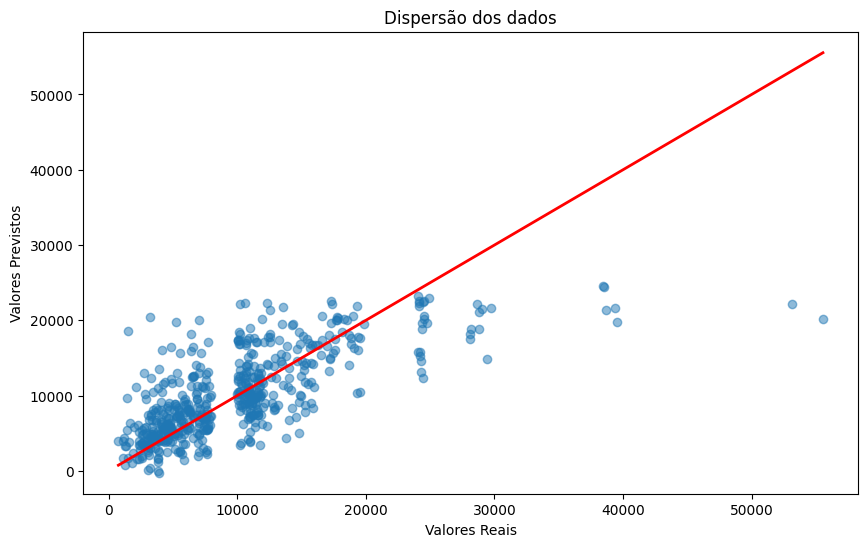

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Dispersão dos dados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()


In [86]:
nomes_atributos = X_train.columns

In [91]:
coefs = pd.DataFrame(model.coef_, columns=['coeficientes'], index=nomes_atributos)

In [92]:
coefs = coefs.sort_values(by='coeficientes', ascending=False)

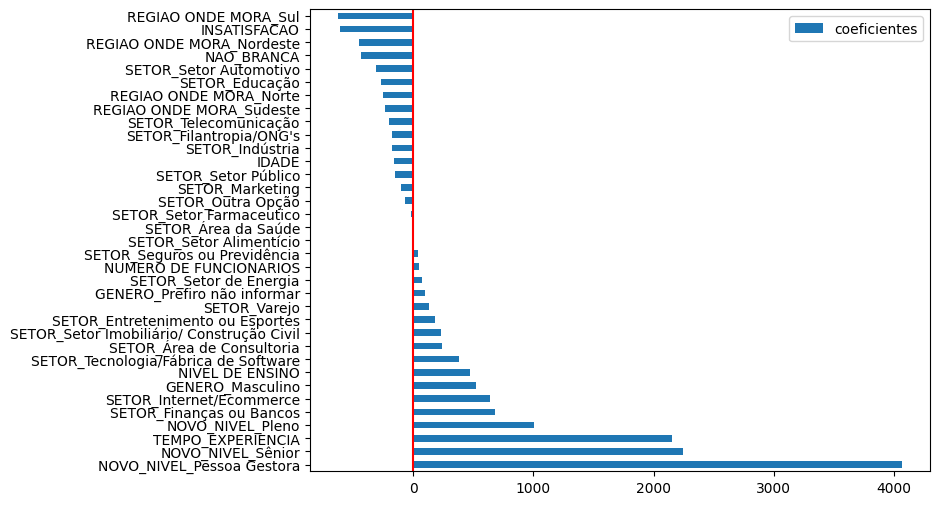

In [94]:
coefs.plot.barh(figsize=(8,6))
plt.axvline(x=0, color='red')